## TVS Credit Epic 5.0 - Analytics Challenge
### Case Study 1 - Two Wheeler Digital Conversion Model

---

#### By Devang Shah

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [38]:
#Importing the dataset
train_data1=pd.read_excel('https://d8it4huxumps7.cloudfront.net/files/64f35619aaf0b_epic_analytics_case1_tw_conversion.xlsx')
train_data1 = pd.DataFrame(train_data1)
train_data1.head()

,LOAN_AMT,LOC_ID,MAKE,MODELS,VARIANT,CAMPAIGN_TYPE,CHANNEL_CODE,GENDER_CODE,MON_INCOME,CALLS_COUNT,...,OWNERSHIP,STATEREGISTERED,CITYREGISTERED,SALARY,PLAN_TO_BUY,ORGANIZATION_NAME,CUSTOMER_TYPE,DEALER_CODE,MOREDETAILSUCV,SUB_DISP_CODE
0,150041,1,NTORQ,0,NaN,TWONL,BD,GM,12558,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25524,1,APACHE,RTR 160 NEW,NaN,TWONL,BD,GM,72999,101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,323489,1,JUPITER,0,NaN,TWONL,BD,0,41159,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,404257,1,APACHE-RR-310,0,0,TWONL,BD,0,53302,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S065
4,80729,1,APACHE,rr310,Null,TWONL,BD,Null,62262,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train_data.describe(include='all')

,LOAN_AMT,LOC_ID,MAKE,MODELS,VARIANT,CAMPAIGN_TYPE,CHANNEL_CODE,GENDER_CODE,MON_INCOME,CALLS_COUNT,...,OWNERSHIP,STATEREGISTERED,CITYREGISTERED,SALARY,PLAN_TO_BUY,ORGANIZATION_NAME,CUSTOMER_TYPE,DEALER_CODE,MOREDETAILSUCV,SUB_DISP_CODE
count,298449.000000,298449.000000,278159,269520.0,191984.0,199423,298449,286220,298449.000000,296372.000000,...,0.0,0.0,0.0,0.0,0.0,40801.0,50841.0,0.0,50875.0,34774
unique,NaN,NaN,106,287.0,75.0,38,35,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113
top,NaN,NaN,TVS,0.0,0.0,TWONL,ML,GM,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S010
freq,NaN,NaN,55125,97332.0,86355.0,166300,87696,132549,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4878
mean,257356.185033,23.032924,NaN,NaN,NaN,NaN,NaN,NaN,45025.507346,10.565178,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
min,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
25%,128918.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,27532.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
50%,257456.000000,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,45042.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
75%,385845.000000,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,62526.000000,12.000000,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
max,514061.000000,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,80000.000000,701.000000,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


In [5]:
for i in train_data.columns:
    print(i, train_data[i].isnull().sum())

LOAN_AMT 0
LOC_ID 0
MAKE 20290
MODELS 28929
VARIANT 106465
CAMPAIGN_TYPE 99026
CHANNEL_CODE 0
GENDER_CODE 12229
MON_INCOME 0
CALLS_COUNT 2077
NO_OF_DAYS 34653
DISBURSAL 0
APPOINTMENTS 0
PAN_CARD 0
PASSPORT 0
VOTER_ID 0
DRIVING_LICENSE 0
RATION_CARD 0
ADHAR_CARD 0
RESIDENT_CODE 190098
RESIDENCE_STABILITY 264418
ACC_CC1 267056
ACC_CC2 298449
ACC_CC3 298449
ACC_CC4 298449
REPAY_CODE 180573
FARMLAND_OWNED 288268
LAND_IN_ACRES 298449
PROPOSED_TENURE 288268
PROPOSED_FREQUENCY 298449
EMPLOYER_NAME 298342
TALUK 248340
INVOICE_AMOUNT 298446
MAX_FUND_AMOUNT 298444
BUY 288267
FINANCE_REQ 288267
SER_LOC_TYPE 288269
DEALER_NAME 248776
REMARKS 274086
VEHICLE_ASS_REQ 288268
TOKEN_MONEY_PAID 288268
ADDPROOF 298449
IDPROOF 298449
INSPROOF 298449
RCPROOF 298449
SIGPROOF 298449
L6PROOF 298449
L3PROOF 298449
ITRPROOF 298449
PROOFOP 296795
INVOICEDATE 298408
CIBIID 298449
CIBILPATH 298449
CIBIL_STATUS 298449
RPICKEDBY 298449
CREDIT_SCORE 298449
DUPLICATE 286630
APPMNT_CATEGORY 298449
CZERO 20395
TOWN 28864

<Axes: xlabel='GENDER_CODE', ylabel='count'>

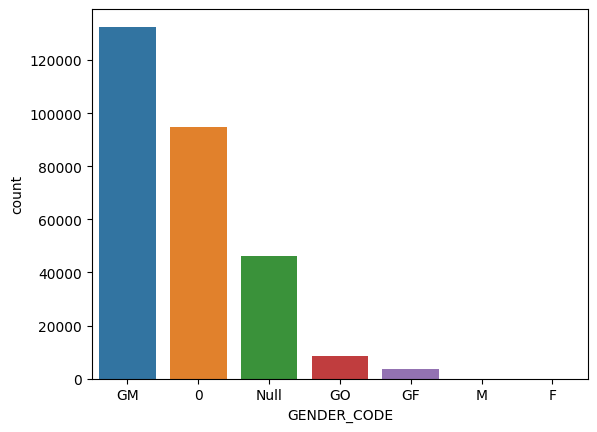

In [6]:
#Gender Statistics
sns.countplot(x=train_data.GENDER_CODE)

<Axes: xlabel='CHANNEL_CODE', ylabel='count'>

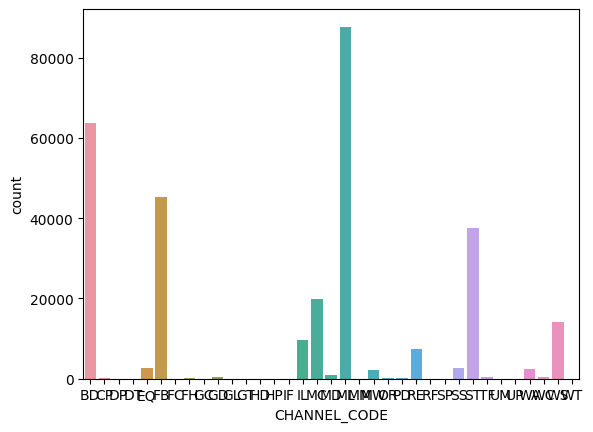

In [7]:
#Campaign channel Statistics
sns.countplot(x=train_data.CHANNEL_CODE)

<Axes: xlabel='DISBURSAL', ylabel='count'>

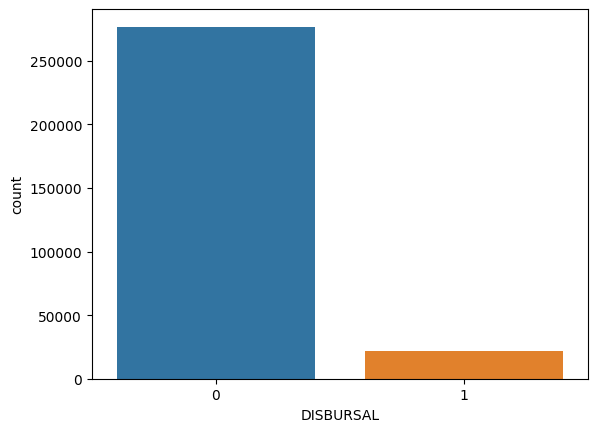

In [8]:
#Loan disbursed or not?
sns.countplot(x=train_data.DISBURSAL)

In [9]:
train_data_copy = train_data

In [11]:
feature_list = [
'LOAN_AMT',
'LOC_ID',
'MAKE' ,
'MODELS' ,
'VARIANT' ,
'CAMPAIGN_TYPE' ,
'CHANNEL_CODE' ,
'GENDER_CODE' ,
'MON_INCOME' ,
'CALLS_COUNT' ,
'NO_OF_DAYS' ,
'APPOINTMENTS' ,
'PAN_CARD' ,
'PASSPORT' ,
'VOTER_ID' ,
'DRIVING_LICENSE',
'RATION_CARD' ,
'ADHAR_CARD' ,
'RESIDENT_CODE' ,
'REPAY_CODE' , 
    'DISBURSAL'
]

In [12]:
train_data_copy =train_data[feature_list]

In [13]:
train_data_copy.shape

(298449, 21)

In [14]:
encode_lst = ["RESIDENT_CODE",
"REPAY_CODE","MAKE"                ,
"MODELS"              ,
"VARIANT"             ,
'CAMPAIGN_TYPE',
'CHANNEL_CODE',
'GENDER_CODE']

In [15]:
%%capture
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
for i in encode_lst:
    train_data_copy[i] = train_data_copy[i].astype(str)
    train_data_copy[i] = labelencoder_X.fit_transform(train_data_copy[i])

In [16]:
print(train_data_copy.isnull().sum())
train_data_copy_copy = train_data_copy
train_data_copy_copy.dropna(subset=['NO_OF_DAYS'],inplace=True)
print(train_data_copy_copy.isnull().sum())

LOAN_AMT               0
LOC_ID                 0
MAKE                   0
MODELS                 0
VARIANT                0
CAMPAIGN_TYPE          0
CHANNEL_CODE           0
GENDER_CODE            0
MON_INCOME             0
CALLS_COUNT         2077
NO_OF_DAYS         34653
APPOINTMENTS           0
PAN_CARD               0
PASSPORT               0
VOTER_ID               0
DRIVING_LICENSE        0
RATION_CARD            0
ADHAR_CARD             0
RESIDENT_CODE          0
REPAY_CODE             0
DISBURSAL              0
dtype: int64
LOAN_AMT           0
LOC_ID             0
MAKE               0
MODELS             0
VARIANT            0
CAMPAIGN_TYPE      0
CHANNEL_CODE       0
GENDER_CODE        0
MON_INCOME         0
CALLS_COUNT        0
NO_OF_DAYS         0
APPOINTMENTS       0
PAN_CARD           0
PASSPORT           0
VOTER_ID           0
DRIVING_LICENSE    0
RATION_CARD        0
ADHAR_CARD         0
RESIDENT_CODE      0
REPAY_CODE         0
DISBURSAL          0
dtype: int64


/tmp/ipykernel_29/1780511690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_copy_copy.dropna(subset=['NO_OF_DAYS'],inplace=True)


In [17]:
#Defining Dependent and Independent Variable
Y = train_data_copy_copy['DISBURSAL']

In [18]:
X = train_data_copy_copy.drop(['DISBURSAL'],axis=1)

In [19]:
print(X.shape)
print(Y.shape)

(263796, 20)
(263796,)


In [20]:
datatypes = X.dtypes
datatypes

LOAN_AMT             int64
LOC_ID               int64
MAKE                 int64
MODELS               int64
VARIANT              int64
CAMPAIGN_TYPE        int64
CHANNEL_CODE         int64
GENDER_CODE          int64
MON_INCOME           int64
CALLS_COUNT        float64
NO_OF_DAYS         float64
APPOINTMENTS         int64
PAN_CARD             int64
PASSPORT             int64
VOTER_ID             int64
DRIVING_LICENSE      int64
RATION_CARD          int64
ADHAR_CARD           int64
RESIDENT_CODE        int64
REPAY_CODE           int64
dtype: object

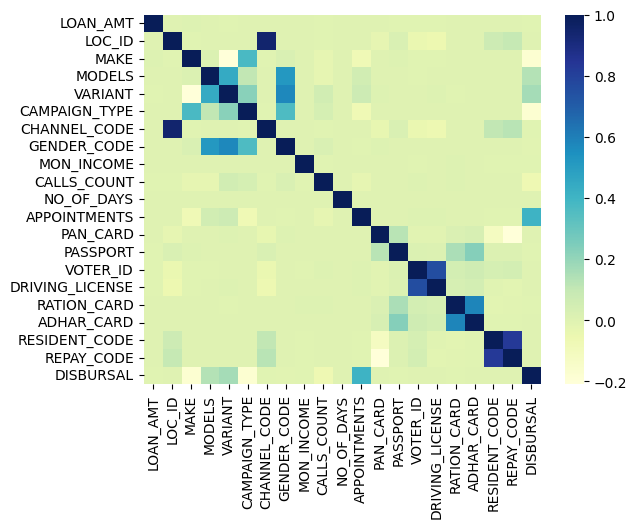

In [23]:
# plotting correlation heatmap
dataplot = sns.heatmap(train_data_copy.corr(), cmap="YlGnBu")
plt.show()

In [24]:
#Splitting the Datatset- Train Size - 75%, Test Size - 25%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.75)

In [26]:
#Importing Required libraries for evaluation
import sklearn.ensemble as ens
from sklearn import tree
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import time

In [30]:
#Evaluating Performance on different types of models. Parameters defined after hyperparameter tuning.
model = { "RandomForest":ens.RandomForestClassifier(n_estimators=50),
        "DecisionTree":tree.DecisionTreeClassifier(max_depth=10),    
         "GradientBoosting":ens.GradientBoostingClassifier(n_estimators=50),
         "GNB":GaussianNB(),
         "LogisticRegression":LogisticRegression()   
}

In [31]:
results = {}
for algo in model:
    clf = model[algo]
    start_time = time.time()
    clf.fit(x_train,y_train)
    train_score = clf.score(x_train,y_train)
    y_pred = clf.predict(x_test)
    test_score = clf.score(x_test,y_test)
    end_time = time.time()
    print ("%s : %s, %s, %s, %s " %(algo, train_score, test_score, abs(test_score-train_score), end_time-start_time))
    results[algo] = test_score

RandomForest : 0.9998180412136651, 0.9571335425859376, 0.042684498627727496, 12.108482837677002 
DecisionTree : 0.9607979903662931, 0.9572093587469105, 0.0035886316193826095, 0.5461697578430176 
GradientBoosting : 0.9567291897274156, 0.9567089720844896, 2.0217642926034785e-05, 15.897790431976318 
GNB : 0.849676770433719, 0.8506573261156348, 0.0009805556819157957, 0.1689298152923584 
LogisticRegression : 0.9355158278872058, 0.9357078954950037, 0.00019206760779788556, 1.3000102043151855 


In [33]:
#Best Model for Training
best_model = max(results, key=results.get)
best_model

'DecisionTree'

In [40]:
best_model = { 
        "DecisionTree":tree.DecisionTreeClassifier(max_depth=10)
}
for algo in best_model:
    clf = model[algo]
    start_time = time.time()
    clf.fit(x_train,y_train)
    train_score = clf.score(x_train,y_train)
    y_pred = clf.predict(x_test)
    test_score = clf.score(x_test,y_test)
    end_time = time.time()
    print ("%s : %s, %s, %s, %s " %(algo, train_score, test_score, abs(test_score-train_score), end_time-start_time))

print(confusion_matrix(y_test, y_pred))
print(clf.feature_importances_)

DecisionTree : 0.9607878815448301, 0.957224521979105, 0.003563359565725066, 0.5528373718261719 
[[60787   850]
 [ 1971  2341]]
[1.02250430e-02 2.61264169e-03 1.84168670e-01 3.40479271e-02
 1.07055176e-01 6.14883069e-02 9.70966411e-04 1.49996069e-02
 1.00215911e-02 1.61072772e-02 2.32407868e-01 3.24471405e-01
 1.08885820e-04 0.00000000e+00 2.21575012e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.07170648e-05 1.01234270e-03]


In [35]:
feature_importances = clf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
lst = x_train.columns
sorted_feature_names = [lst[i] for i in sorted_indices]

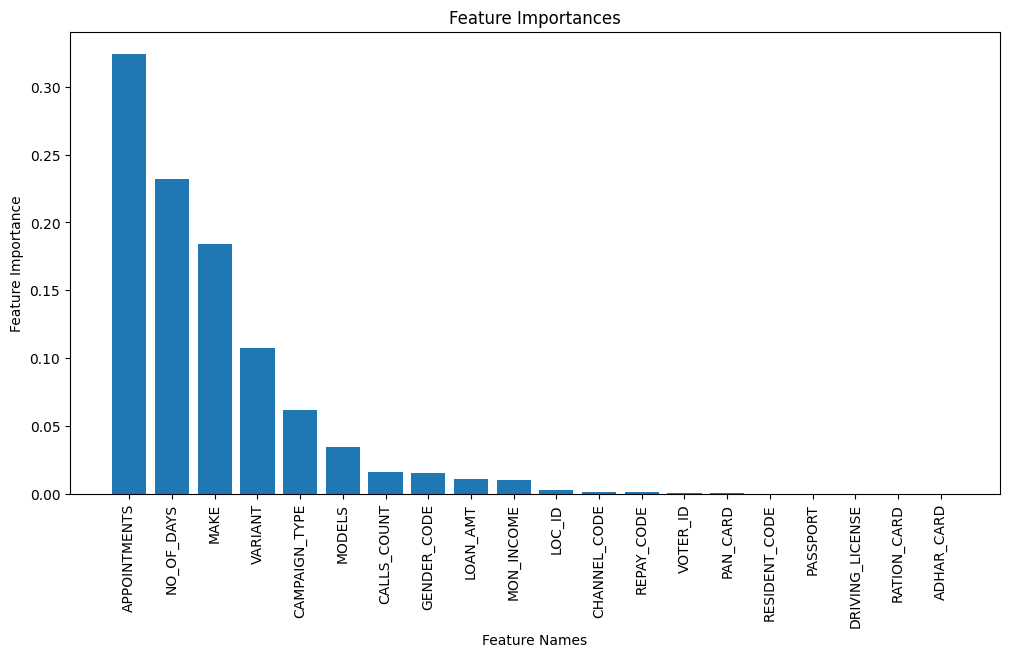

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(sorted_feature_names, sorted_feature_importances)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()

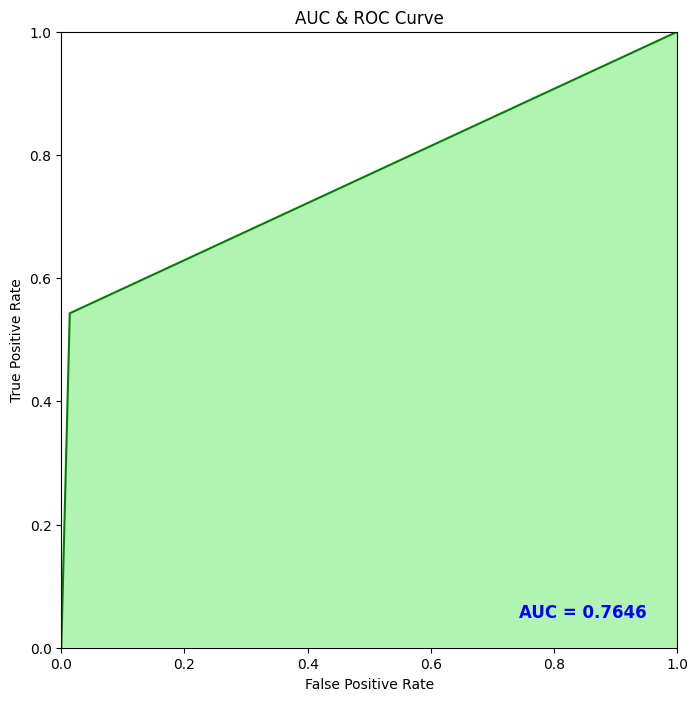

In [41]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()